<a href="https://colab.research.google.com/github/rohitashwachaks/advanced_optimisation/blob/main/Assignments/HW1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Homework-1

rc47878

In [9]:
import tensorflow as tf
import numpy as np

import matplotlib.pyplot as plt

# Preprocessing

All grayscale values are represented using pixel values between 0 to 255.

I, however, would like to make an assumption that the _"light-grey"_ and the _faded_ pixels don't carry much useful information.

Thus, in my opinion, we can convert the grayscale images to 'black-&-white' images instead, reducing model size by a factor of 8 (we need one bit of information for each pixel now)

In [10]:
def gray2bw(arr: np.array, threshold: int = 0.3):
  return np.where(arr > threshold, 1, 0)

The above function converts a grey-scale numpy array to black&white depending on a given threshold. A lower value of the threshold is chosen to ensure not too much of the digit inormation is lost

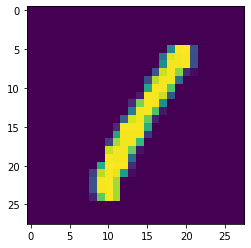

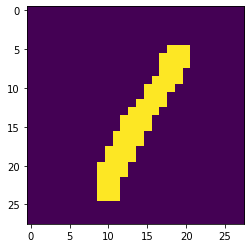

In [11]:
mnist = tf.keras.datasets.mnist

(x_train, y_train),(x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

img = x_train[3]
plt.imshow(img)
plt.show()
plt.imshow(gray2bw(img))

ndata_train = x_train.shape[0]
ndata_test = x_test.shape[0]


In [12]:
x_train = x_train.reshape((ndata_train,28,28,1))
x_test = x_test.reshape((ndata_test,28,28,1))
xshape = x_train.shape[1:4]
print(xshape)

(28, 28, 1)


## Model

In [13]:
x_train = gray2bw(x_train)
x_test = gray2bw(x_test)

In [14]:
class MNIST_Model:
  def __init__(self)-> tf.keras.models.Sequential:
    self.model =  tf.keras.models.Sequential([
          tf.keras.layers.Conv2D(filters=32,kernel_size=6,activation=tf.nn.relu,input_shape=xshape),
          tf.keras.layers.Conv2D(filters=64,kernel_size=5,activation=tf.nn.relu,input_shape=xshape),
          tf.keras.layers.MaxPooling2D(pool_size = (2,2),strides=2),
          tf.keras.layers.Conv2D(filters=64,kernel_size=5,activation=tf.nn.relu,input_shape=xshape),
          tf.keras.layers.Conv2D(filters=128,kernel_size=4,activation=tf.nn.relu,input_shape=xshape),
          tf.keras.layers.MaxPooling2D(pool_size = (2,2),strides=2),
          tf.keras.layers.Flatten(),
          tf.keras.layers.Dropout(0.25),
          tf.keras.layers.Dense(128,activation=tf.nn.relu,kernel_regularizer = tf.keras.regularizers.l1(0.0002)),
          tf.keras.layers.Dense(10,activation=tf.nn.softmax)
          ])
    print(self.model.summary())
    return

  def compile(self)->None:
    self.model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
    
  def fit(self, x_train, y_train, epochs=50, validation_split=0.2, batch_size = 250):
    if validation_split:
      self.history = self.model.fit(x_train,y_train,epochs=epochs,validation_split=0.2,batch_size=batch_size)
    else:
      self.history = self.model.fit(x_train,y_train,epochs=epochs,batch_size=batch_size)
    return

  def preds(self, x_train):
    return self.model.predict(x_test)

  def plot(self):
    plt.plot(self.history.history['loss'])
    if 'val_loss' in self.history.history:
      plt.plot(self.history.history['val_loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'val'], loc='upper left')
    plt.show()

In [15]:
cnn_model = MNIST_Model()
cnn_model.compile()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 23, 23, 32)        1184      
                                                                 
 conv2d_5 (Conv2D)           (None, 19, 19, 64)        51264     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 9, 9, 64)         0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 5, 5, 64)          102464    
                                                                 
 conv2d_7 (Conv2D)           (None, 2, 2, 128)         131200    
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 1, 1, 128)        0         
 2D)                                                  

Epoch 1/50
192/192 [==============================] - 7s 31ms/step - loss: 0.5665 - accuracy: 0.8799 - val_loss: 0.2430 - val_accuracy: 0.9735
Epoch 2/50
192/192 [==============================] - 6s 32ms/step - loss: 0.2375 - accuracy: 0.9727 - val_loss: 0.2000 - val_accuracy: 0.9827
Epoch 3/50
192/192 [==============================] - 7s 34ms/step - loss: 0.1867 - accuracy: 0.9809 - val_loss: 0.1644 - val_accuracy: 0.9852
Epoch 4/50
192/192 [==============================] - 6s 33ms/step - loss: 0.1528 - accuracy: 0.9853 - val_loss: 0.1392 - val_accuracy: 0.9865
Epoch 5/50
192/192 [==============================] - 6s 32ms/step - loss: 0.1274 - accuracy: 0.9871 - val_loss: 0.1185 - val_accuracy: 0.9877
Epoch 6/50
192/192 [==============================] - 6s 33ms/step - loss: 0.1057 - accuracy: 0.9891 - val_loss: 0.1062 - val_accuracy: 0.9867
Epoch 7/50
192/192 [==============================] - 6s 31ms/step - loss: 0.0888 - accuracy: 0.9901 - val_loss: 0.0910 - val_accuracy: 0.9889

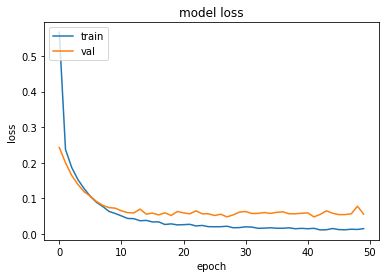

In [16]:
cnn_model.fit(x_train,y_train)
cnn_model.plot()


The above model was trained over 50 epochs and has a 99.13% validation accuracy.

In [17]:
# Test set accuracy
pred_probs2 = cnn_model.model.predict(x_test)
pred2 = np.argmax(pred_probs2, axis=1)
print(np.mean(pred2==y_test))

0.9923


Furthermore, it has a 99.23% test dataset accuracy

## Retraining on the whole Data

Since the above model does an acceptable job at classifying the images in the MNIST dataset, we choose to go ahead and finalise this model.

To do so, the model is once again trained on the entire training dataset; and its accuracy is calculated on the test dataset

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 23, 23, 32)        1184      
                                                                 
 conv2d_9 (Conv2D)           (None, 19, 19, 64)        51264     
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 9, 9, 64)         0         
 2D)                                                             
                                                                 
 conv2d_10 (Conv2D)          (None, 5, 5, 64)          102464    
                                                                 
 conv2d_11 (Conv2D)          (None, 2, 2, 128)         131200    
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 1, 1, 128)        0         
 2D)                                                  

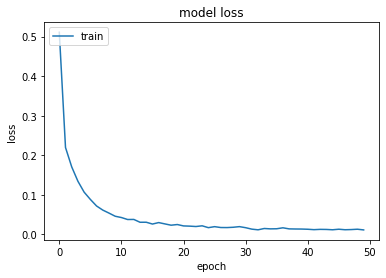

In [18]:
cnn_model = MNIST_Model()
cnn_model.compile()
cnn_model.fit(x_train, y_train, validation_split=None)
cnn_model.plot()

## How does retraining on the whole training set impact on the MNIST test set?

In [19]:
pred_probs2 = cnn_model.model.predict(x_test)
pred2 = np.argmax(pred_probs2, axis=1)
print(np.mean(pred2==y_test))

0.9929


We observe that the Test Accuracy has increased.

## Inference:

In both the cases, the network architecture is the same.
In the latter case (model trained on the entire training set), our model has more data to learn from. Thus, It learns 'more' than it had in the first case (training set was split between training set and validation set)

Therefore, more data to train on implies better results.

## Missclassification Plots

In [20]:
missclassified_index = np.where(pred2!= y_test)[0]
missclassified = x_test[missclassified_index]
print(missclassified.shape)
missclassified = np.reshape(missclassified, missclassified.shape[0:3])
print(missclassified.shape)

(71, 28, 28, 1)
(71, 28, 28)


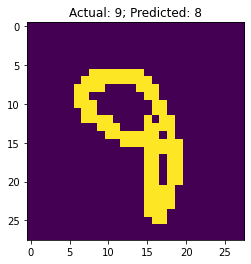

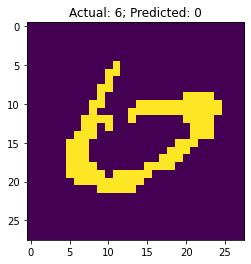

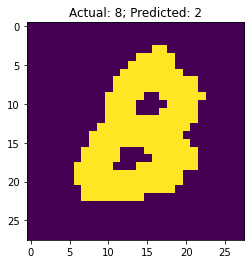

In [21]:
for index, k in enumerate(missclassified_index[:3]):
  plt.imshow(missclassified[index])
  plt.title(f'Actual: {y_test[k]}; Predicted: {pred2[k]}')
  plt.show()

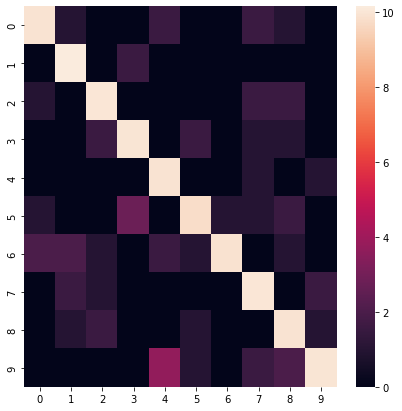

     0     1     2     3    4    5    6     7    8    9
0  974     1     0     0    2    0    0     2    1    0
1    0  1133     0     2    0    0    0     0    0    0
2    1     0  1027     0    0    0    0     2    2    0
3    0     0     2  1004    0    2    0     1    1    0
4    0     0     0     0  980    0    0     1    0    1
5    1     0     0     6    0  881    1     1    2    0
6    3     3     1     0    2    1  947     0    1    0
7    0     2     1     0    0    0    0  1023    0    2
8    0     1     2     0    0    1    0     0  969    1
9    0     0     0     0   12    1    0     2    3  991


In [26]:
import seaborn as sns
import pandas as pd

confusion_matrix = tf.math.confusion_matrix(labels=y_test, predictions=pred2, num_classes=10)

# scaling the confusion matrix to highlight missclassification:
# confusion_matrix = np.round(np.log2(confusion_matrix+1))
plt.gcf().set_size_inches(7, 7,  forward=True)
sns.heatmap(np.log2(confusion_matrix+1))
plt.show()
# print(pd.DataFrame(confusion_matrix, index = [i for i in range(10)], columns = [i for i in range(10)]))
print(pd.DataFrame(np.array(confusion_matrix), index = [i for i in range(10)], columns = [i for i in range(10)]))
# sns.heatmap(np.log2(confusion_matrix+1))

Most commonly missclassified are:
<table>
  <thead>
    <td>Actual</td>
    <td>Predicted</td>
  </thead>
  <tr>
    <td>0</td>
    <td>6</td>
  </tr>
  <tr>
    <td>1</td>
    <td>6 , 7 , 8</td>
  </tr>
  <tr>
    <td>3</td>
    <td>5</td>
  </tr>
  <tr>
    <td>4</td>
    <td>9</td>
  </tr>
  <tr>
    <td>6</td>
    <td>5</td>
  </tr>
  <tr>
    <td>7</td>
    <td>1</td>
  </tr>
  <tr>
    <td>9</td>
    <td>0 , 4 , 7</td>
  </tr>
</table>


Looking at some of the missclassified images, it is clear so as to WHY the said images confuse the model. These images are difficult for even the human eye to decipher.

Maybe the human annotator himself misclassified the data??